### Develop LSTM (Long-Short Term Model) For Univariate Time Series Forecasting

In [1]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [9]:
X.shape

(6, 3, 1)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [14]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=0)


### Predicting For the next 10 data

In [17]:
# demonstrate prediction for next 10 days
x_input =np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[221.39058]
1 day input [196.         210.         221.39057922]
1 day output [[232.21664]]
2 day input [210.         221.39057922 232.21664429]
2 day output [[245.54716]]
3 day input [221.39058 232.21664 245.54716]
3 day output [[257.60202]]
4 day input [232.21664 245.54716 257.60202]
4 day output [[270.5841]]
5 day input [245.54716 257.60202 270.5841 ]
5 day output [[284.5124]]
6 day input [257.60202 270.5841  284.5124 ]
6 day output [[298.34973]]
7 day input [270.5841  284.5124  298.34973]
7 day output [[313.0853]]
8 day input [284.5124  298.34973 313.0853 ]
8 day output [[328.47818]]
9 day input [298.34973 313.0853  328.47818]
9 day output [[344.26]]
[221.39058, 232.21664, 245.54716, 257.60202, 270.5841, 284.5124, 298.34973, 313.0853, 328.47818, 344.26]


In [18]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [19]:
len(timeseries_data)

9

In [20]:
lst_output

[221.39058,
 232.21664,
 245.54716,
 257.60202,
 270.5841,
 284.5124,
 298.34973,
 313.0853,
 328.47818,
 344.26]

In [22]:
#lst

### Visualizaing The Output

In [23]:
import matplotlib.pyplot as plt

In [24]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

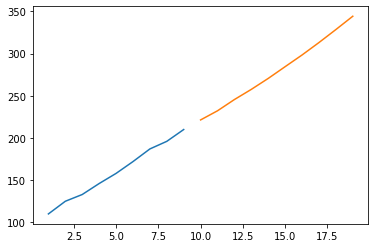

In [25]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
